In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



In [5]:
df = pd.read_csv("./Datasets/dataset_selected_features.csv")


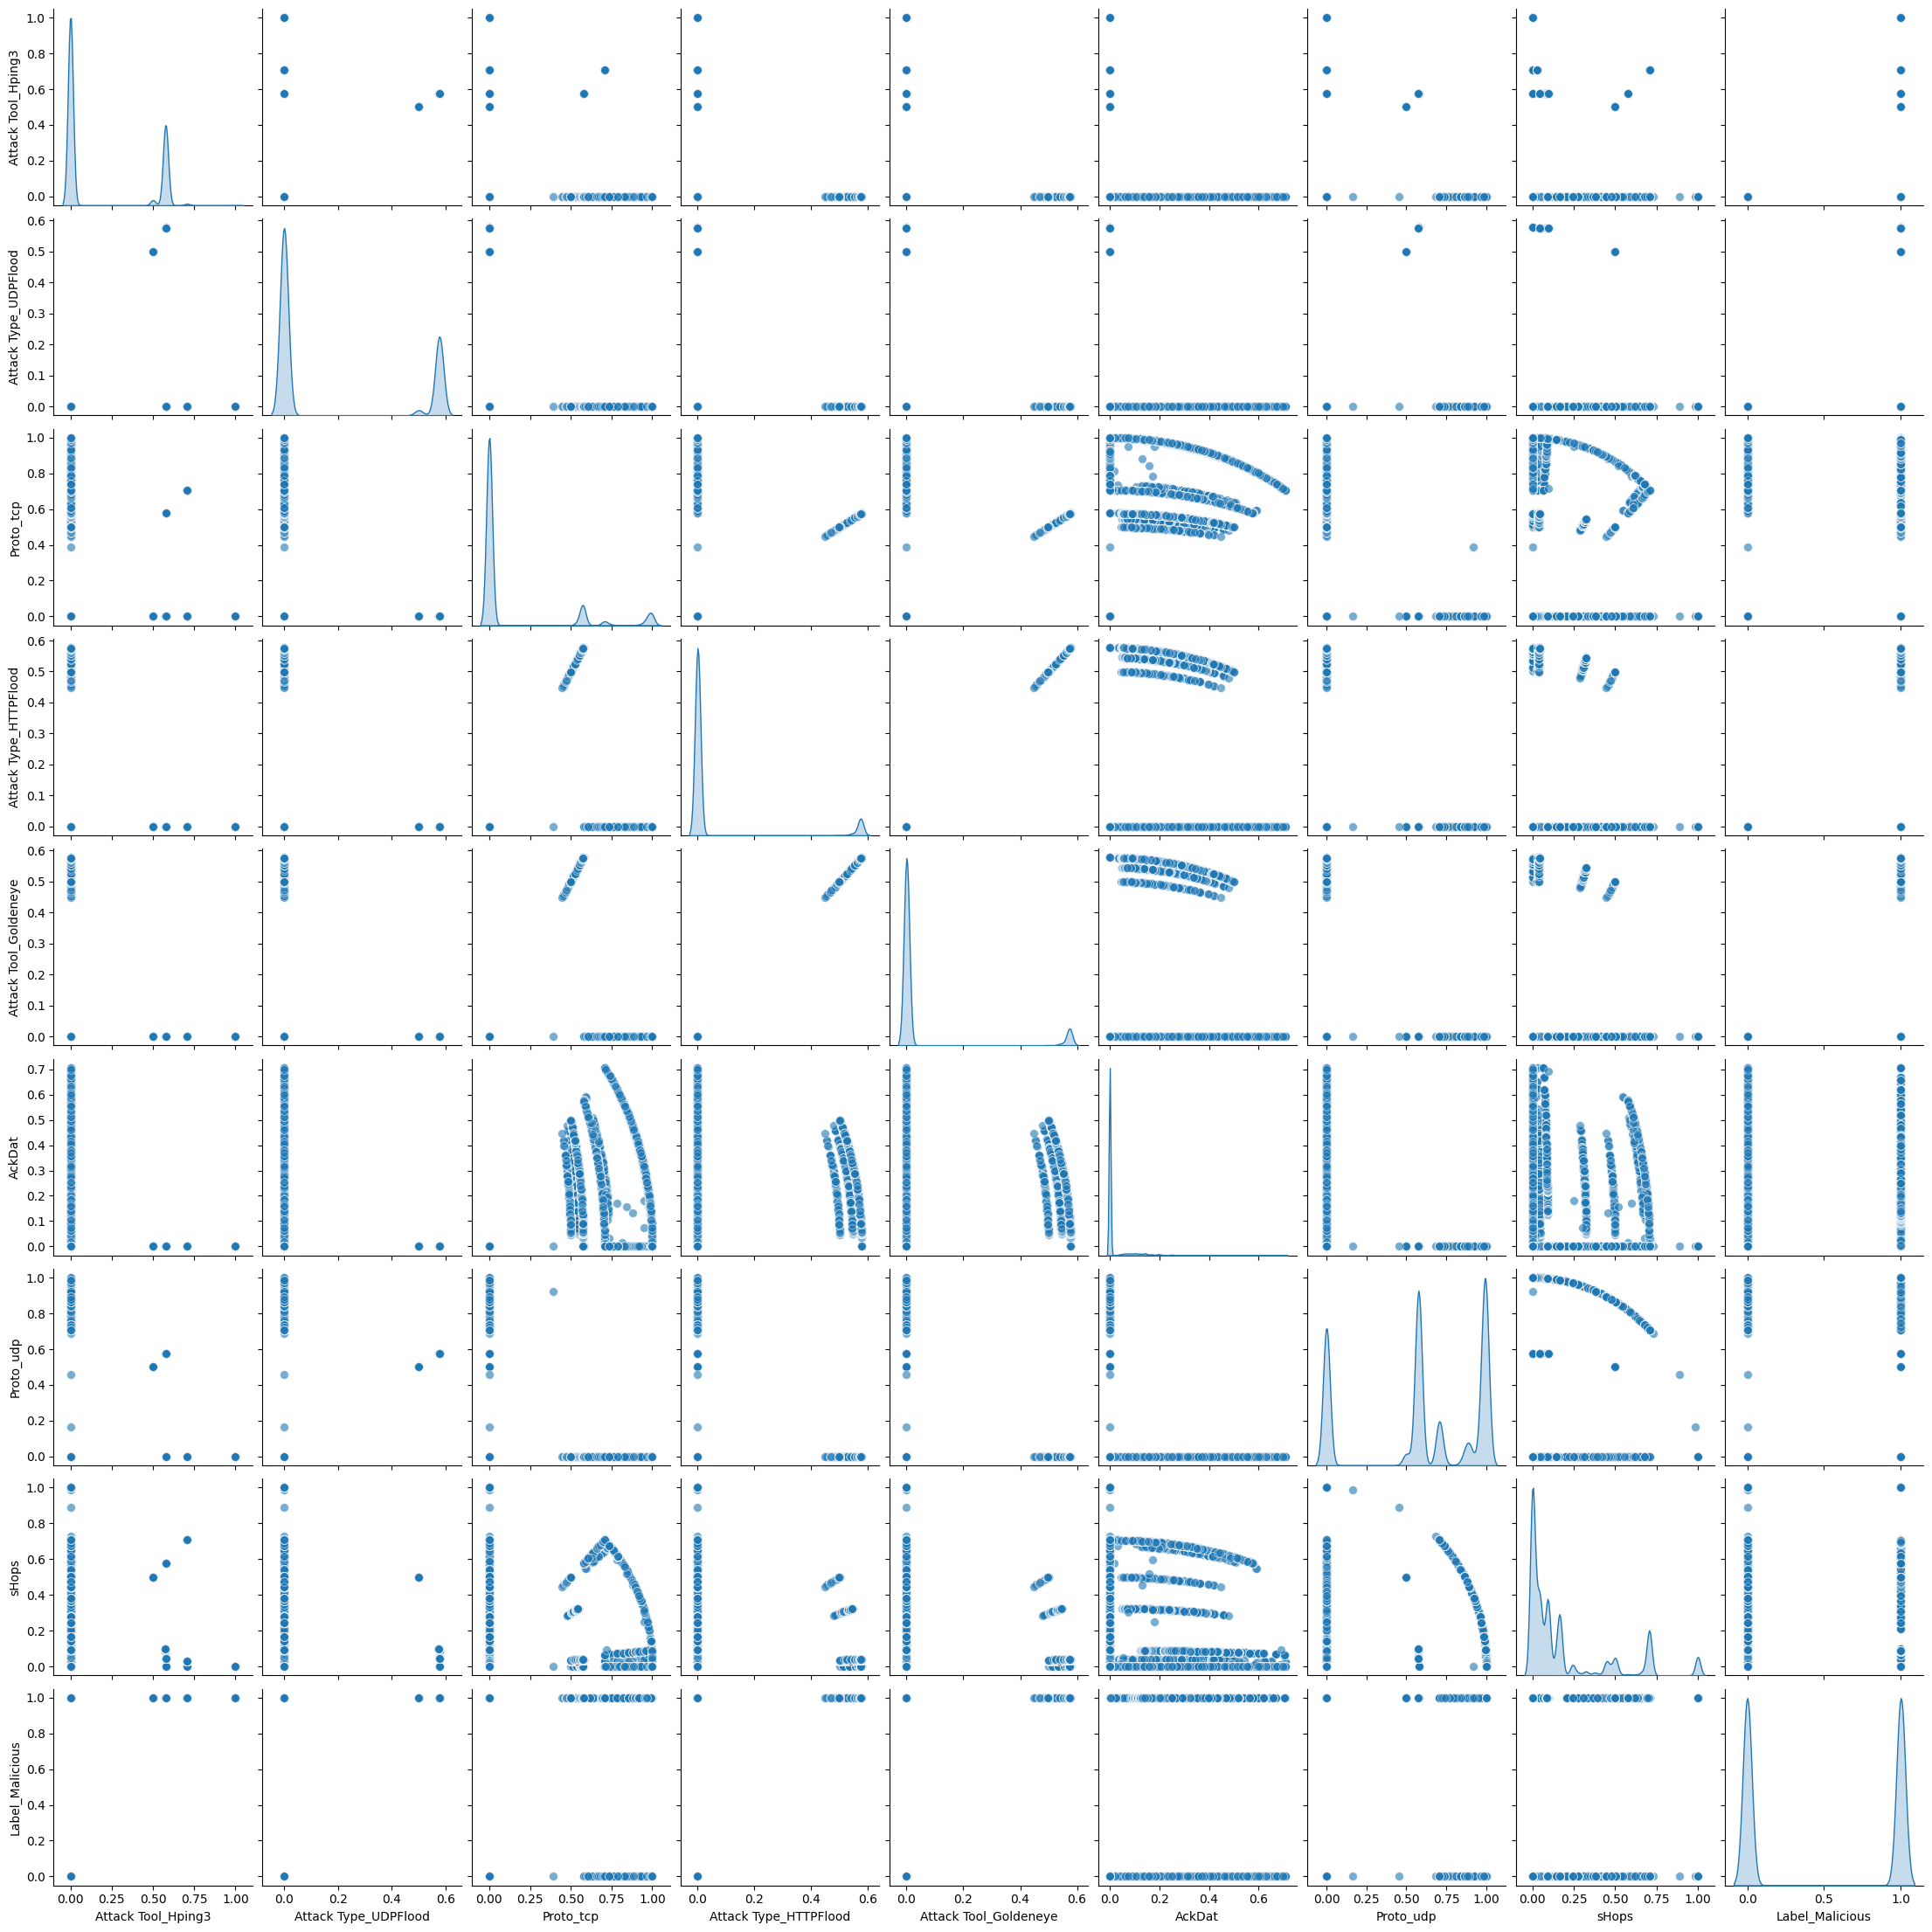

In [6]:

sns.pairplot(df, diag_kind="kde", plot_kws={'alpha':0.6, 's':50})
plt.show()


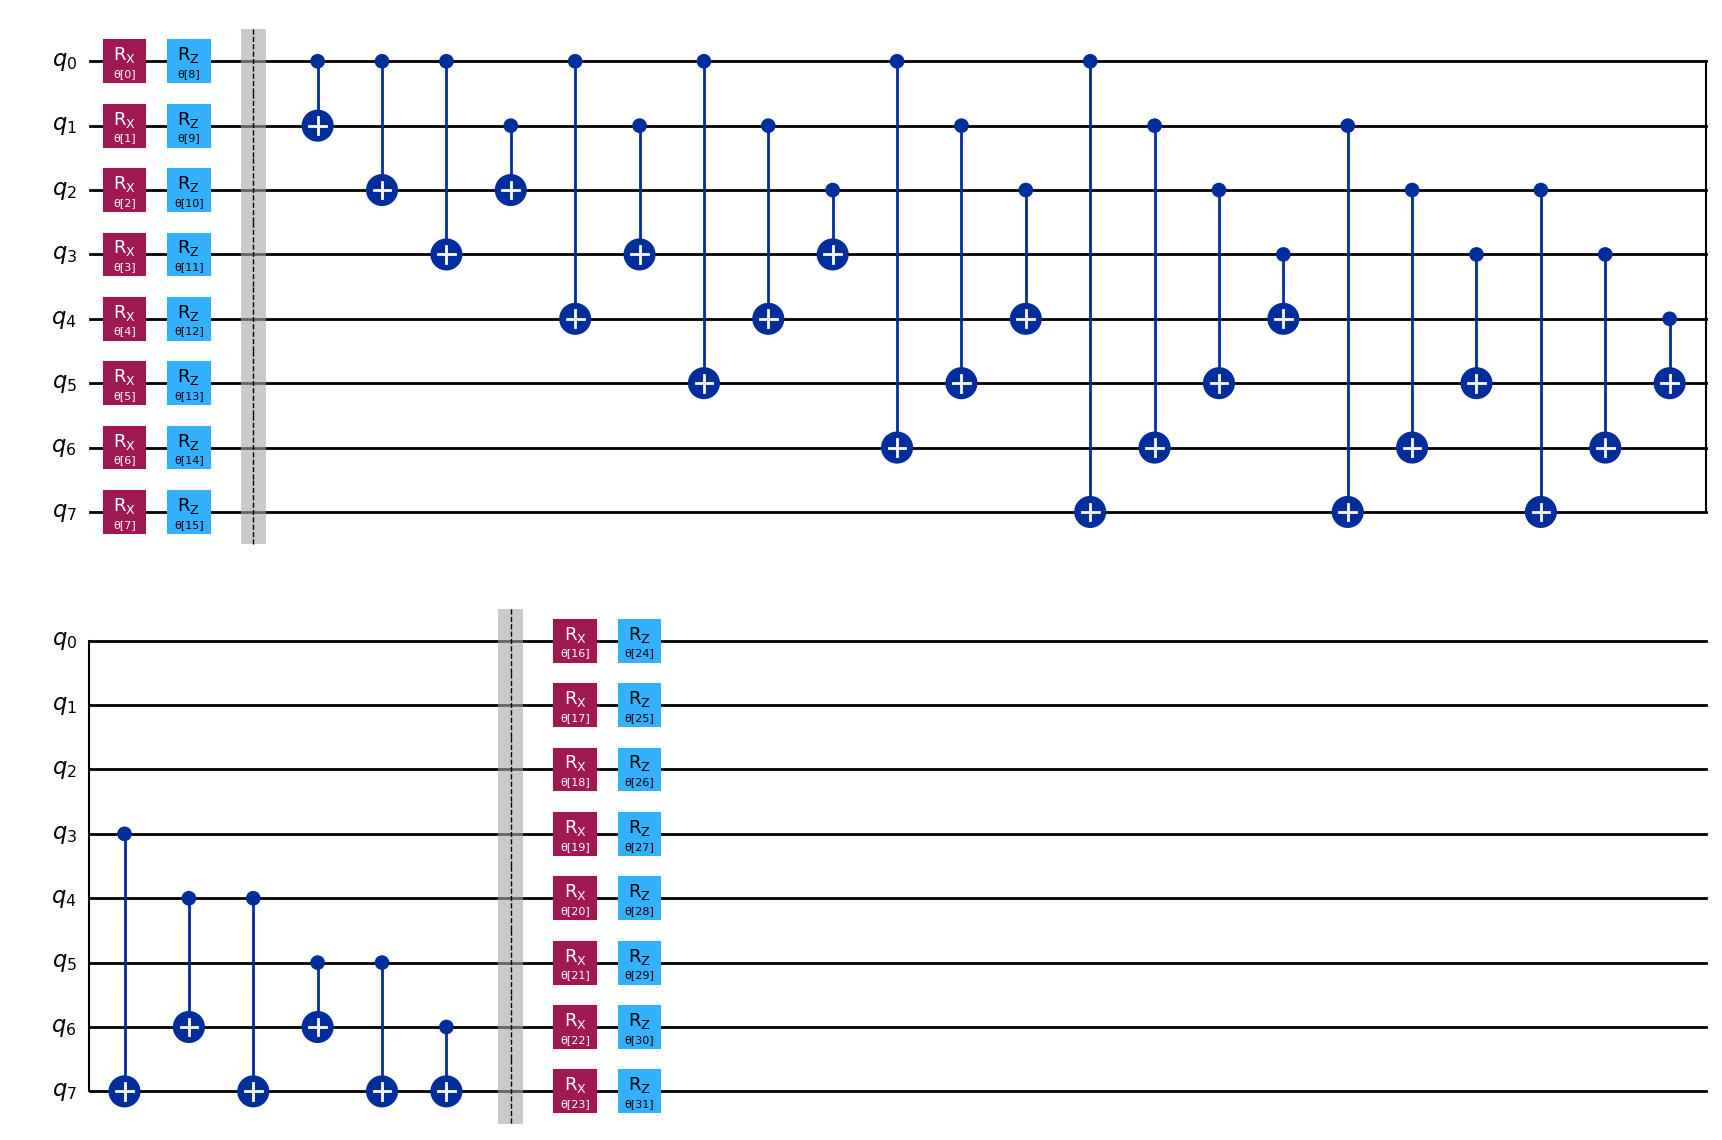

In [23]:
from qiskit.circuit.library import TwoLocal ,   RealAmplitudes
ansatz = TwoLocal(num_qubits=8,
                  rotation_blocks=['rx','rz'],
                  entanglement_blocks='cx',
                  entanglement='full',   # only q0-q1 entanglement
                  reps=1,
                  insert_barriers=True)

ansatz.decompose().draw('mpl')


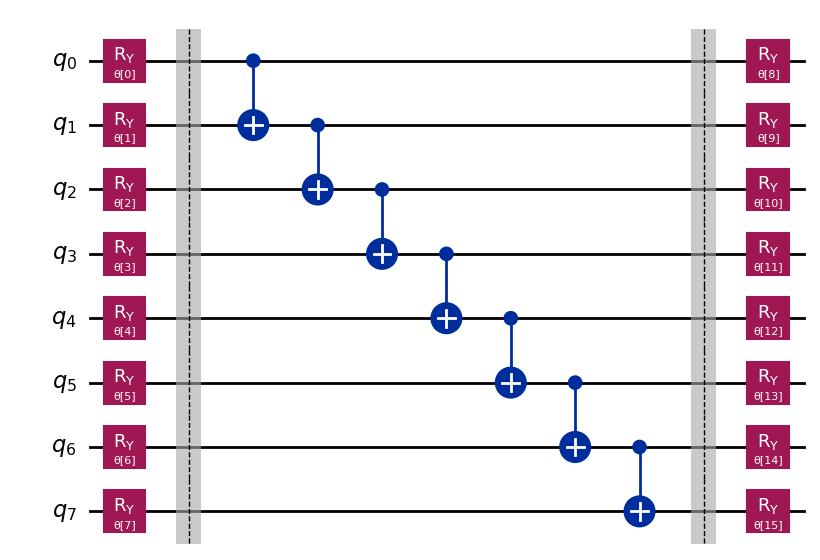

In [21]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=8,
                       reps=1,
                       entanglement='linear',  # pre-defined pattern
                       insert_barriers=True)
ansatz.decompose().draw('mpl')

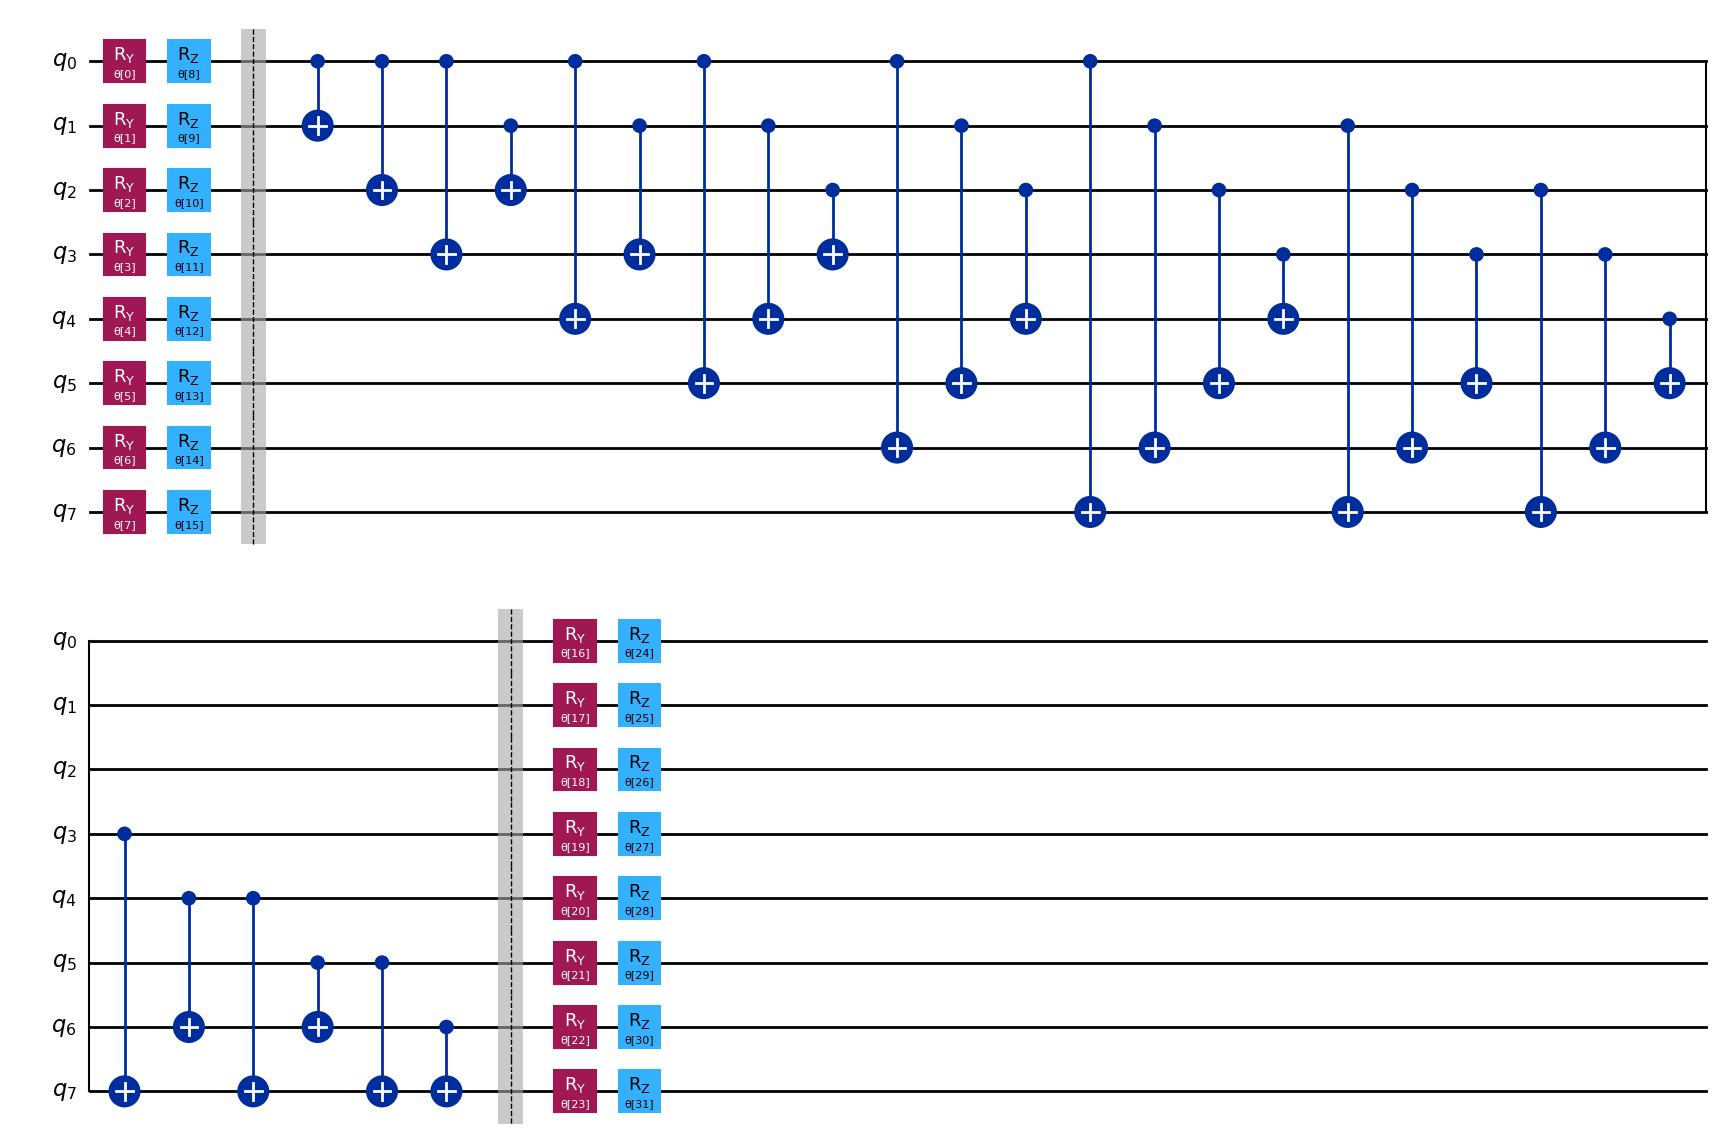

In [30]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=8,
                     reps=1,
                     entanglement='full',
                     insert_barriers=True)

ansatz.decompose().draw('mpl')

Parameters: ParameterView([Parameter(θ_0), Parameter(θ_1), Parameter(θ_2), Parameter(θ_3), Parameter(θ_4), Parameter(θ_5), Parameter(θ_6), Parameter(θ_7)])


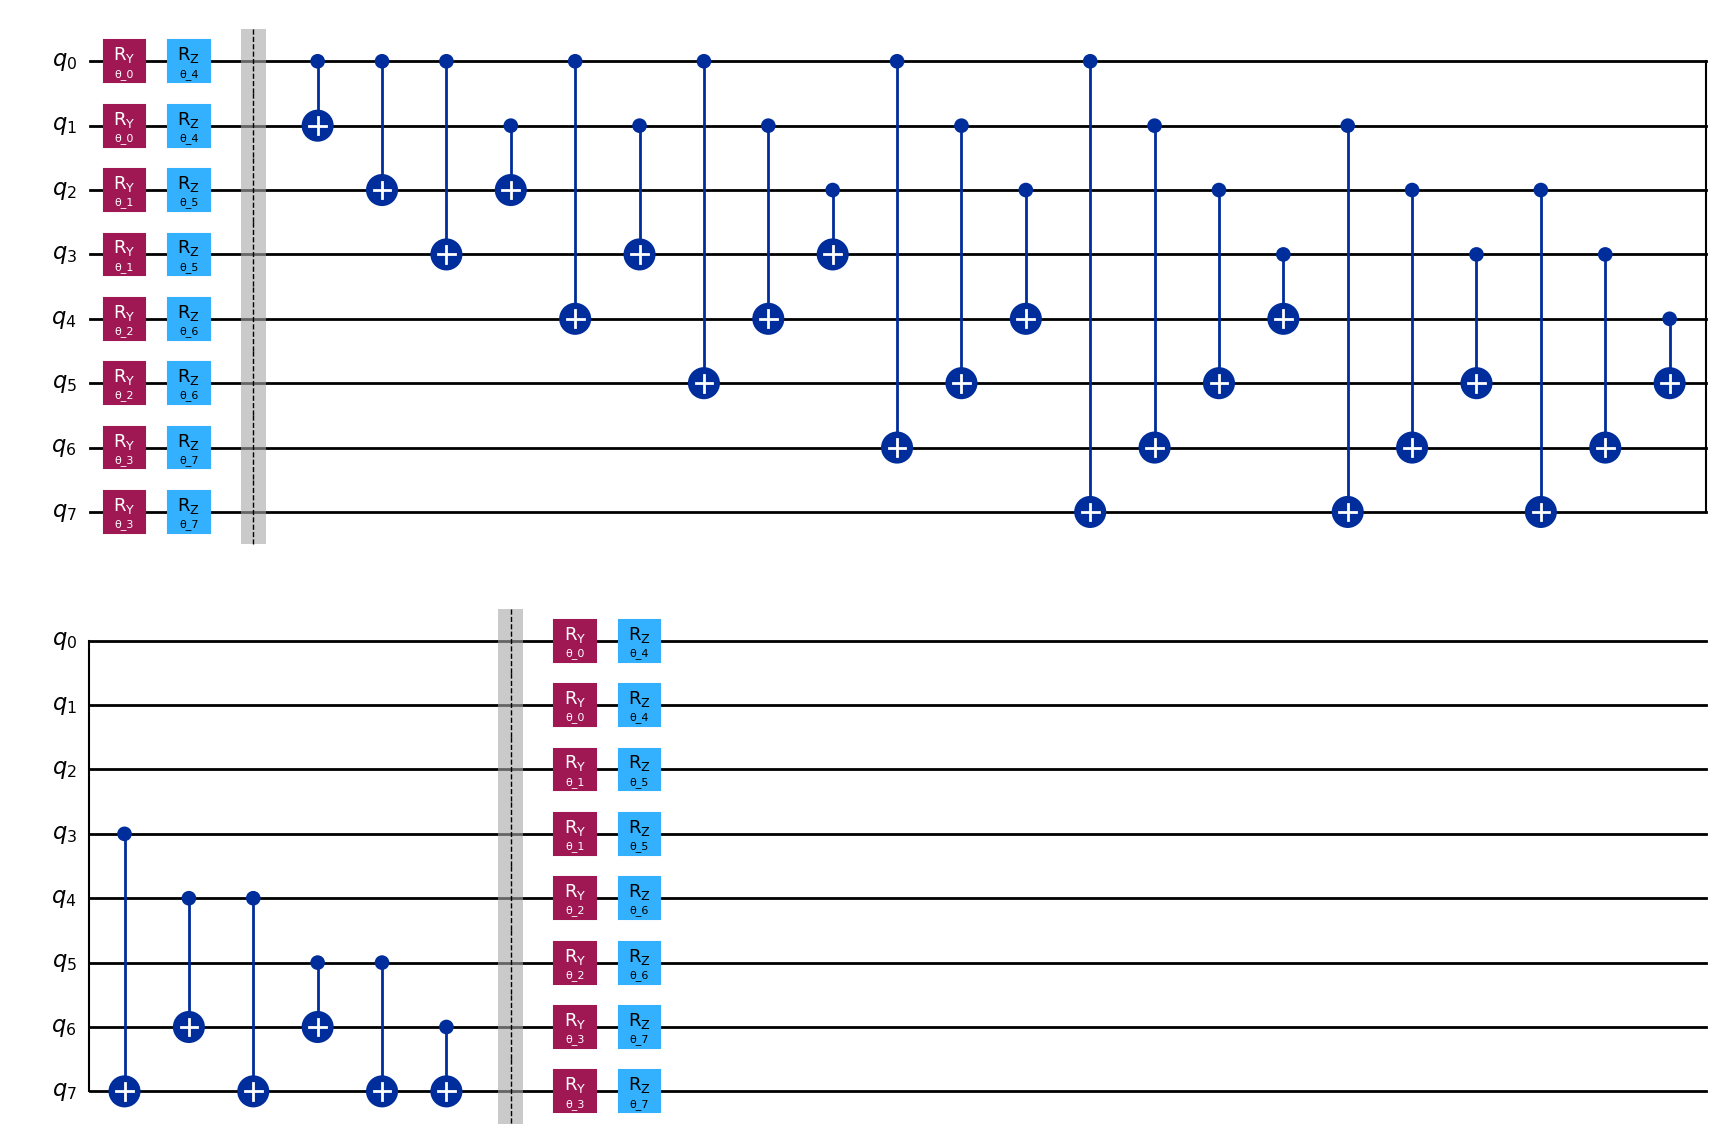

In [28]:
from qiskit.circuit.library import EfficientSU2
from qiskit.circuit import Parameter

num_qubits = 8
ansatz = EfficientSU2(num_qubits=num_qubits, reps=1, entanglement='full', insert_barriers=True)

# Create one theta per qubit
thetas = [Parameter(f"θ_{i}") for i in range(num_qubits)]

# Build mapping: each qubit’s ry and rz share the same parameter
param_map = {}
for i, p in enumerate(sorted(ansatz.parameters, key=lambda x: int(x.name.strip("θ[]")))):
    qubit_index = (i // 2) % num_qubits   # group every ry, rz pair
    param_map[p] = thetas[qubit_index]

# Apply mapping
shared_ansatz = ansatz.assign_parameters(param_map, inplace=False)

print("Parameters:", shared_ansatz.parameters)   # should print {θ_0, θ_1, …, θ_7}
shared_ansatz.decompose().draw('mpl')

